# Podcasts - Exploratory Data Analysis

## Loading libraries and data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from imblearn.over_sampling import SMOTE
import itertools
import nltk
import collections
pd.set_option('display.max_columns', None)
import os

In [2]:
def print_Classification_report(model, X_train, y_train, X_test, y_test, train=True):

    if train:
        ypred_train = model.predict(X_train)
        classification_train = classification_report(y_train, ypred_train)
        conf_matrix_train = confusion_matrix(y_train, ypred_train)

        print("Train Result:\n===========================================")
        print(f"Classification report:\n")
        print(classification_train)
        print(f"Confusion_matrix:\n {conf_matrix_train}\n")

    elif train==False:
        ypred_test = model.predict(X_test)
        classification_test = classification_report(y_test, ypred_test)
        conf_matrix_test = confusion_matrix(y_test, ypred_test)

        print("Test Result:\n===========================================")
        print(f"Classification report:\n")
        print(classification_test)
        print(f"Confusion_matrix:\n {conf_matrix_test}\n")

In [3]:
def print_scoresClassification(model, X_train, y_train, X_test, y_test, train=True):
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}

    if train:
        scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
        ypredTrain = model.predict(X_train)
        Acc_train = scores['test_acc'].mean()
        Precision_train = scores['test_prec_macro'].mean()
        Recall_train = scores['test_rec_macro'].mean()
        F1_train = scores['test_f1_macro'].mean()
        conf_matrix_train = confusion_matrix(y_train, ypredTrain)
        clasif_train = classification_report(y_train, ypredTrain)

        print("Train Result:\n===========================================")
        print(f"Accuracy : {Acc_train:.4f}\n")
        print(f"Precision: {Precision_train:.4f}\n")
        print(f"Recall: {Recall_train:.4f}\n")
        print(f"F1 score: {F1_train:.4f}\n")
        print(clasif_train)
        print(f"Confusion_matrix:\n {conf_matrix_train}\n")

    elif train==False:
        scores = cross_validate(model, X_test, y_test, cv=10, scoring=scoring)
        ypredtest = model.predict(X_test)
        Acc_test = scores['test_acc'].mean()
        Precision_test = scores['test_prec_macro'].mean()
        Recall_test = scores['test_rec_macro'].mean()
        F1_test = scores['test_f1_macro'].mean()
        conf_matrix_test = confusion_matrix(y_test, ypredtest)
        clasif_test = classification_report(y_test, ypredtest)


        print("test Result:\n===========================================")
        print(f"Accuracy : {Acc_test:.4f}\n")
        print(f"Precision: {Precision_test:.4f}\n")
        print(f"Recall: {Recall_test:.4f}\n")
        print(f"F1 score: {F1_test:.4f}\n")
        print(clasif_test)
        print(f"Confusion_matrix:\n {conf_matrix_test}\n")

In [4]:
#load the dataset
filename = 'all_podcasts.csv'
df = pd.read_csv(filename)
df.head()

Unnamed: 0  podcast_id                                      name   
0           0  1446936288       The Coach's Wife Chronicles Podcast  \
1           1  1205327374                                 Not Alone   
2           2  1450115847  Soaring the sky a glider pilot's Podcast   
3           3  1404709155                                 Londrelle   
4           4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description contentRating   
0  Get an in depth look into life as a Coach's wi...         clean  \
1  Not Alone is a weekly podcast covering all thi...         clean   
2  An Aviation podcast about soaring with sailpla...         clean   
3  A collection of love inspired talks with poet/...         clean   
4  This is a running plan designed to get complet...         clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', '

## Data pre-processing

In [5]:
#get information on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19559 entries, 0 to 19558
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19559 non-null  int64  
 1   podcast_id            19559 non-null  int64  
 2   name                  19559 non-null  object 
 3   genres                19559 non-null  object 
 4   author                19559 non-null  object 
 5   description           19559 non-null  object 
 6   contentRating         19559 non-null  object 
 7   avg_rating            19559 non-null  float64
 8   num_ratings           19559 non-null  int64  
 9   num_ratings_1star     19559 non-null  int64  
 10  num_ratings_2star     19559 non-null  int64  
 11  num_ratings_3star     19559 non-null  int64  
 12  num_ratings_4star     19559 non-null  int64  
 13  num_ratings_5star     19559 non-null  int64  
 14  episode_names         19559 non-null  object 
 15  episode_description

In [6]:
#drop the first column which has no useful information
df.drop('Unnamed: 0', axis = 1, inplace=True)
#rename column for contentRating
df.rename(columns = {'contentRating': 'content_rating'}, inplace=True)

In [7]:
#check for duplicates
df.duplicated().sum()

130

In [8]:
#drop duplicates
df.drop_duplicates(inplace=True)
#check for any duplicates in the id column
df.podcast_id.duplicated().sum()

0

In [9]:
#check for missing values
df.isnull().sum()
#nulls may show up in other ways which we will identify as we explore the data.

podcast_id              0
name                    0
genres                  0
author                  0
description             0
content_rating          0
avg_rating              0
num_ratings             0
num_ratings_1star       0
num_ratings_2star       0
num_ratings_3star       0
num_ratings_4star       0
num_ratings_5star       0
episode_names           0
episode_descriptions    0
episode_durations       0
episode_dates           0
num_episodes_sample     0
review_ratings          0
review_titles           0
reviews                 0
review_dates            0
num_reviews_sample      0
dtype: int64

### Language detection

In [10]:
from langdetect import detect # Library that will identify language

In [11]:
def detect_language (text):
    try:
        return detect(text)
    except:
        return 'Unknown'

In [12]:
df['description_lang'] = df['description'].apply(detect_language)

In [13]:
df.description_lang.value_counts()

description_lang
en         18315
es           296
ar           123
fr            89
fa            89
de            71
zh-cn         67
pt            66
ru            34
ko            28
pl            27
ja            20
th            18
tr            17
no            15
nl            14
it            13
he            11
af            10
id             9
sv             8
vi             8
da             8
zh-tw          7
so             7
Unknown        6
et             6
ca             5
fi             5
cs             5
cy             4
hu             4
sk             4
tl             3
sw             3
ta             2
el             2
hi             2
uk             2
lt             1
ur             1
sq             1
gu             1
mk             1
ro             1
Name: count, dtype: int64

In [14]:
#print some of the ones which are not in english
df[df.description_lang != 'en']

podcast_id                                               name   
19     1121173801        สมเด็จพระญาณสังวร สมเด็จพระสังฆราช สกลมหาสั  \
49     1486621740                         Academia de Conspiraciones   
56     1483943676                           Yine Yeni Yeniden 90'lar   
79     1488697127  Un américain en Auvergne France Bleu Pays d'Au...   
101    1237121723                                             晓说2018   
...           ...                                                ...   
19520   306300922                                       Noticias ONU   
19523  1505809664                                    Música Regional   
19526  1496946095                           El Contador de Películas   
19536   275472625                                 Tu Ingles! podcast   
19539   137307413                                            Hora 25   

                                                  genres   
19     ['Buddhism', 'Podcasts', 'Religion & Spiritual...  \
49         ['Stand-Up', 'Podcasts', 'Comedy', 'History']   
56     ['Music History', 'Podcasts', 'Music', 'News',...   
79                     ['Nature', 'Podcasts', 'Science']   
101    ['Personal Journals', 'Podcasts', 'Society & C...   
...                                                  ...   
19520                 ['Daily News', 'Podcasts', 'News']   
19523             ['Music History', 'Podcasts', 'Music']   
19526          ['Film History', 'Podcasts', 'TV & Film']   
19536  ['Language Learning', 'Podcasts', 'Education',...   
19539                 ['Daily News', 'Podcasts', 'News']   

                               author   
19                    Thammapedia.com  \
49         Academia de Conspiraciones   
56     İlker Hepkaner & Sezgin İnceel   
79                        France Bleu   
101                            晓说2018   
...                               ...   
19520                  United Nations   
19523                   Jorge Ramírez   
19526                     Cooperativa   
19536                      Tu Ingles!   
19539                      Cadena SER   

                                             description content_rating   
19     ธรรมะบรรยาย โดยสมเด็จพระญาณสังวร สมเด็จพระสังฆ...          clean  \
49     Bienvenidos a la Academia de Conspiraciones, d...       explicit   
56     Yine Yeni Yeniden 90’lara hoşgeldiniz. Bu podc...          clean   
79     Il est américain, installé en Auvergne. Il nou...          clean   
101    高晓松，《晓说2018》，每周五不见不散，听矮大紧老师谈笑风生，聊超级碗、颁奖季，讲讲满是历...          clean   
...                                                  ...            ...   
19520                La actualidad de la ONU en el mundo          clean   
19523  El conocer las raízces de la Música regional M...          clean   
19526  Cine y series en un podcast semanal sobre lo q...          clean   
19536  Vamos a ejercitar tu oído para inglés! Practic...          clean   
19539  El programa líder de la noche informativa, con...          clean   

       avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
19            4.3            3                  0                  0  \
49            5.0            4                  0                  0   
56            5.0            5                  0                  0   
79            0.0            0                  0                  0   
101           4.5          157                  7                  7   
...           ...          ...                ...                ...   
19520         4.5           25                  1                  2   
19523         0.0            0                  0                  0   
19526         5.0            1                  0                  0   
19536         4.7          254                  8                  6   
19539         3.9           26                  5                  1   

       num_ratings_3star  num_ratings_4star  num_ratings_5star   
19                     1                  0                  2  \
49                     0      

In [15]:
#drop the ones that are not in English
df = df.drop(df[df.description_lang != 'en'].index)

In [16]:
#verify the drop worked
df.shape

(18315, 24)

## Podcast name

In [17]:
#check for nulls.
df.name.isnull().sum()

0

In [18]:
#check for any empty strings
df[df.name == ""]

Empty DataFrame
Columns: [podcast_id, name, genres, author, description, content_rating, avg_rating, num_ratings, num_ratings_1star, num_ratings_2star, num_ratings_3star, num_ratings_4star, num_ratings_5star, episode_names, episode_descriptions, episode_durations, episode_dates, num_episodes_sample, review_ratings, review_titles, reviews, review_dates, num_reviews_sample, description_lang]
Index: []

In [19]:
df[df.name == "Unknown"]

Empty DataFrame
Columns: [podcast_id, name, genres, author, description, content_rating, avg_rating, num_ratings, num_ratings_1star, num_ratings_2star, num_ratings_3star, num_ratings_4star, num_ratings_5star, episode_names, episode_descriptions, episode_durations, episode_dates, num_episodes_sample, review_ratings, review_titles, reviews, review_dates, num_reviews_sample, description_lang]
Index: []

In [20]:
#check for duplicates
df.name.duplicated().sum()

49

In [21]:
#get list of duplicate names podcasts
duplicate_names = df.name[df.name.duplicated()]
duplicate_names

3711                                      Safari Stories
3893                                 Daily Tanya (Audio)
4547                                       Critical Role
5618                                     Song of the Day
6810                                 Conspiracy Theories
6953                                  The Streaming Wars
7303                          Radio Detective Story Hour
7577                                          Unladylike
8684                                     Another Kingdom
8686                        SCP Foundation Audio Archive
9005                                       The Big Story
9414                                      The New Normal
9649                                    Marketplace Tech
9699                    Rambam - 1 Chapter a Day (Audio)
9715                                          Rapid Fire
9920                        The Law & Order: SVU Podcast
10828                   RunRunLive 4.0 - Running Podcast
10973                 The Thist

In [22]:
#check if these are really duplicates
for name in duplicate_names:
    print('Podcast name: {}'.format(name))
    print('Podcast author: {}'.format(df.author[df.name == name]))
    print('Podcast description: ', df.description[df.name == name])
    print('')

Podcast name: Safari Stories
Podcast author: 265     Jomi Krobb and Hadley Pierce
3711                     John Lister
Name: author, dtype: object
Podcast description:  265     Trunks & Tracks Co-founders Jomi Krobb and Had...
3711    The Safari Stories podcast is a collection of ...
Name: description, dtype: object

Podcast name: Daily Tanya (Audio)
Podcast author: 3865    Chabad.org: Yehoshua B. Gordon
3893        Chabad.org: Manis Friedman
Name: author, dtype: object
Podcast description:  3865    Chabad Chassidus is an all-embracing world out...
3893    Chabad Chassidus is an all-embracing world out...
Name: description, dtype: object

Podcast name: Critical Role
Podcast author: 2865    Geek & Sundry
4547    Critical Role
Name: author, dtype: object
Podcast description:  2865    Voice actor Matthew Mercer leads a group of fe...
4547    Welcome to Critical Role, where a bunch of ner...
Name: description, dtype: object

Podcast name: Song of the Day
Podcast author: 1264    Minnesota P

In [23]:
#drop the ones where the author and the name are the same
df.drop_duplicates(['name','author'], inplace=True)

In [24]:
#check again for duplicate names
duplicate_names_cleaner = df.name[df.name.duplicated()]
for name in duplicate_names_cleaner:
    print('Podcast name: ', name)
    print('Podcast author: ', df.author[df.name == name])
    print('Podcast description: ', df.description[df.name == name])
    print('')

Podcast name:  Safari Stories
Podcast author:  265     Jomi Krobb and Hadley Pierce
3711                     John Lister
Name: author, dtype: object
Podcast description:  265     Trunks & Tracks Co-founders Jomi Krobb and Had...
3711    The Safari Stories podcast is a collection of ...
Name: description, dtype: object

Podcast name:  Daily Tanya (Audio)
Podcast author:  3865    Chabad.org: Yehoshua B. Gordon
3893        Chabad.org: Manis Friedman
Name: author, dtype: object
Podcast description:  3865    Chabad Chassidus is an all-embracing world out...
3893    Chabad Chassidus is an all-embracing world out...
Name: description, dtype: object

Podcast name:  Critical Role
Podcast author:  2865    Geek & Sundry
4547    Critical Role
Name: author, dtype: object
Podcast description:  2865    Voice actor Matthew Mercer leads a group of fe...
4547    Welcome to Critical Role, where a bunch of ner...
Name: description, dtype: object

Podcast name:  Song of the Day
Podcast author:  1264    Min

In [25]:
#second round, drop any where name and description are the same
print('before: ', df.shape)
df = df.drop_duplicates(['name','description'])
print('after: ', df.shape)

before:  (18292, 24)
after:  (18289, 24)


In [26]:
#check what the names look like
df.name[:50]

0                   The Coach's Wife Chronicles Podcast
1                                             Not Alone
2              Soaring the sky a glider pilot's Podcast
3                                             Londrelle
4                                       NHS Couch to 5K
5     Always Already Podcast, a critical theory podcast
6                 CAUTIONARY TALES with Jason Pettigrew
7                                     Eat It, Virginia!
8                                      Gabba Gabba Huh?
9              The Happiness Lab with Dr. Laurie Santos
10                                     Geaux247 Podcast
11                                   LeVar Burton Reads
12                                        Best BBQ Show
13                                  By Projection Light
14                                   Thyroid Refresh TV
15                                     More Than Enough
16                                     Heartfeldt Radio
17                                            20

### Clean and tokenize

In [27]:
#we have some non latin characters, punctuation, capitals, etc. Let's remove all of these

#clean the names
def clean_names(name):
    import re
    import regex
    lowercase_name = name.lower()
    #strip non alphanumeric chars
    alphanum_name = re.sub(r'[^\w\s]', '', lowercase_name)
    #strip non-latin characters
    clean_name = regex.sub(r'[^\p{Latin}\s]', '', alphanum_name)
    return clean_name


df['name_clean'] = df['name'].apply(lambda x: clean_names(x))
df['name_clean'][:50]

0                    the coachs wife chronicles podcast
1                                             not alone
2               soaring the sky a glider pilots podcast
3                                             londrelle
4                                        nhs couch to k
5      always already podcast a critical theory podcast
6                 cautionary tales with jason pettigrew
7                                       eat it virginia
8                                       gabba gabba huh
9               the happiness lab with dr laurie santos
10                                        geaux podcast
11                                   levar burton reads
12                                        best bbq show
13                                  by projection light
14                                   thyroid refresh tv
15                                     more than enough
16                                     heartfeldt radio
17                                              

In [28]:
#make a new column with tokenized names
#import stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['podcast', 'show', 'radio', 'talk'])

#import lemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#make a function to tokenize names
def tokenize_names(name):
    #split the name on spaces
    split_name = name.split(' ')
    #remove stopwords
    no_stop_words = [w for w in split_name if w not in stop_words]
    #lemmatize words
    tokenized_name = [lemmatizer.lemmatize(w) for w in no_stop_words]
    return tokenized_name

df['name_tok'] = df['name_clean'].apply(lambda x: tokenize_names(x))
#df_clean['name_tok'][:50]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brato\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brato\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


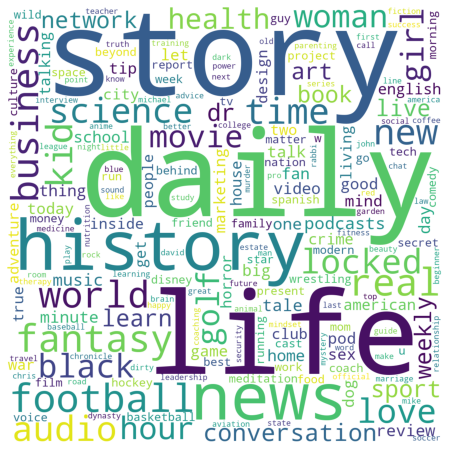

In [29]:
#list of all words in podcast names
all_words_names = df['name_tok'].sum()
counted_words_names = collections.Counter(all_words_names)
counted_words_names.most_common(50)

#make a wordcloud of most common words in podcast titles
from wordcloud import WordCloud
titles_wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate_from_frequencies(counted_words_names)
plt.figure(figsize=(8,8))
plt.imshow(titles_wordcloud)
plt.axis("off")
plt.show()

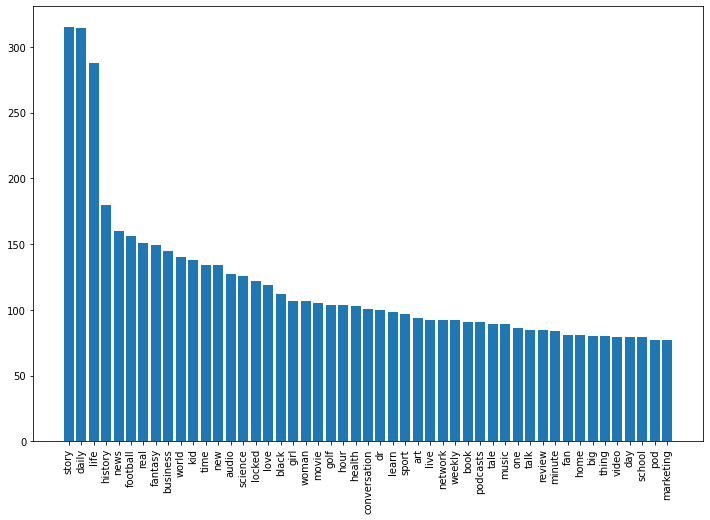

In [30]:
#plot the most common words
#get 100 most common words
mc_words_names = counted_words_names.most_common(50)
#convert to a dict
dict_words_names = dict(mc_words_names)
dict_words_names.pop('')
#make countplot
plt.figure(figsize = (12,8))
plt.bar(dict_words_names.keys(), dict_words_names.values())
plt.xticks(rotation=90)
plt.show()

## Exploring the genres

In [31]:
#check for empty values in the genres
df[df.genres == ""]

Empty DataFrame
Columns: [podcast_id, name, genres, author, description, content_rating, avg_rating, num_ratings, num_ratings_1star, num_ratings_2star, num_ratings_3star, num_ratings_4star, num_ratings_5star, episode_names, episode_descriptions, episode_durations, episode_dates, num_episodes_sample, review_ratings, review_titles, reviews, review_dates, num_reviews_sample, description_lang, name_clean, name_tok]
Index: []

In [32]:
#print a selection of genres
df.genres[:10]

0    ['Personal Journals', 'Podcasts', 'Society & C...
1    ['History', 'Podcasts', 'Religion & Spirituali...
2                  ['Aviation', 'Podcasts', 'Leisure']
3      ['Philosophy', 'Podcasts', 'Society & Culture']
4                     ['Health & Fitness', 'Podcasts']
5      ['Philosophy', 'Podcasts', 'Society & Culture']
6    ['Music Interviews', 'Podcasts', 'Music', 'Mus...
7     ['Food', 'Podcasts', 'Arts', 'Health & Fitness']
8    ['Music History', 'Podcasts', 'Music', 'Music ...
9       ['Society & Culture', 'Podcasts', 'Education']
Name: genres, dtype: object

In [33]:
#get list of all genres
def make_list_column(column):
    import re
    master_list =[]
    for row in column:
        row_list = row.split(',')
        for word in row_list:
            word = word.replace("'", "")
            word = word.replace("[", "")
            word = word.replace("]", "")
            word = word.strip()
            master_list.append(word)
    return master_list

In [34]:
#apply the function to our list of genres
genre_list = make_list_column(df.genres)

In [35]:
#count up the genres
counted_genres = collections.Counter(genre_list)

In [36]:
df_genres = pd.DataFrame.from_dict(counted_genres, orient='index').reset_index()
df_genres.columns = ['Genres', 'Number']
pd.set_option('display.max_rows', None)
df_genres.sort_values('Number', ascending = False)

Genres  Number
1                   Podcasts   18289
17                    Sports    2560
2          Society & Culture    2272
27                      News    2203
15                 Education    2002
8           Health & Fitness    1984
39                  Business    1854
13                      Arts    1796
6                    Leisure    1745
4    Religion & Spirituality    1471
23                 TV & Film    1369
20                    Comedy    1302
63                   Science    1224
57             Kids & Family    1072
10                     Music     867
31                   Fiction     728
36          Self-Improvement     647
66                Technology     491
35               Sports News     488
42          Entrepreneurship     486
54                   Hobbies     463
78             Mental Health     411
19           Performing Arts     406
3                    History     404
34              Spirituality     398
38                    How To     397
40                   Careers     394
61              Christianity     378
25        Alternative Health     377
0          Personal Journals     363
72                  Politics     348
79                  Medicine     340
85                   Fitness     339
55              Film Reviews     335
75             Relationships     334
24                 Nutrition     330
16                  Football     328
97                Government     328
95                TV Reviews     328
51                     Games     323
11          Music Commentary     322
88                   Courses     320
32                     Drama     319
41                 Marketing     313
7                 Philosophy     312
76          Natural Sciences     308
69             Business News     308
91               After Shows     306
21         Comedy Interviews     306
64                Management     305
26           News Commentary     304
99                     Books     304
9           Music Interviews     301
58           Places & Travel     301
43                True Crime     297
101              Visual Arts     296
82                 Tech News     293
68                 Parenting     292
93           Science Fiction     283
30                 Sexuality     279
28               Documentary     277
84                 Investing     273
53                Wilderness     269
52        Entertainment News     269
80                    Design     267
14             Music History     266
98                    Improv     259
18                Basketball     259
90                Non-Profit     256
94            Comedy Fiction     252
87            Fantasy Sports     249
50               Video Games     248
62           Social Sciences     244
12                      Food     243
103            Home & Garden     236
104         Fashion & Beauty     231
83                  Baseball     230
74                    Hockey     228
56        Education for Kids     227
86           Film Interviews     223
29                 Wrestling     222
22              Film History     222
100                   Nature     219
77                  Religion     217
46                  Stand-Up     217
48                Automotive     215
37                      Golf     215
65                   Running     209
59         Language Learning     209
67             Life Sciences     209
89            Pets & Animals     208
92                   Judaism     205
81          Stories for Kids     200
73                Daily News     197
47                    Soccer     193
49                  Buddhism     188
60         Animation & Manga     158
5                   Aviation     153
44                     Islam     111
33                  Hinduism      97
71            Earth Sciences      97
70                    Crafts      77
110                Astronomy      55
106                   Tennis      53
96                     Rugby      52
107                  Physics      39
45                   Cricket      31
105                 Swimmi

In [37]:
df_genres.shape

(111, 2)

We can distinguish the following broad genres:
* Sports: includes Sports, Sports News, Football, Basketball, Fantasy Sports, Running, Hockey, Baseball, Soccer, Wrestling, Golf, Tennis, Rugby, Swimming, Cricket, Volleyball,
* News & Current affairs: includes News, Politics, Government, News Commentary, Daily News
* Education: includes Education, Courses, Language Learning, How To
* Health, Fitness: includes Health and Fitness, Mental Health, Alternative Health, Fitness, Medicine, Nutrition
* Lifestyle & Leisure: Food, Fashion & Beauty, Home & Garden, Relationships, Parenting, Places & Travel, Sexuality, Personal Journals, Leisure, Hobbies, Crafts, Self-Improvement
* Business and Career includes: Business, Entrepreneurship, Marketing, Business News, Careers, Management, Investing, Non-Profit
* Art & Literature: includes Arts, Music, Fiction, Performing Arts, Music Commentary, Drama, Books, Music Interviews, Visual Arts, Music History, Science Fiction
* Religion & Spirituality: includes Religion & Spirituality, Spirituality, Christianity, Religion, Judaism, Buddhism, Islam, Hinduism
* TV & Film: includes TV & Film, Film Reviews, TV Reviews, Film Interviews, Film History, After Shows, Animation & Manga
* Comedy: includes Comedy, Comedy Interviews, Improv, Comedy Fiction, Stand-Up
* Science & Technology: Includes Science, Technology, Natural Sciences, Tech News, Life Sciences, Earth Sciences, Astronomy, Physics, Chemistry, Mathematics, Design
* Nature: Nature, Wilderness, Pets & Animals
* Kids: includes Kids & family, Education for Kids, Stories for Kids
* History & Philosophy: History, Philosophy, Social Sciences
* Games: includes Games, Video Games
* Documentary & True Crime: includes Documentary, True Crime
* Vehicles: includes Aviation, Automotive

We exclude from this list 2 genres that are too broad to be meaningful: "Pocasts" and "Society & Culture".


In [38]:
#define a function which determines the main genres of a podcast
def main_genre(genres):
    genre_scores = {'sports_score': 0, 'news_score':0, 'education_score':0, 'health_score':0, 'lifestyle_score':0,
                    'vehicles_score' : 0, 'business_score':0, 'art_score':0, 'religion_score':0, 'tv_score':0,
                    'comedy_score':0, 'science_score':0, 'nature_score':0, 'kids_score':0, 'history_score':0,
                    'games_score':0, 'documentary_score':0, 'num_genres':0}
    genre_list = genres.split(',')
    for genre in genre_list:
            genre = genre.replace("'", "")
            genre = genre.replace("[", "")
            genre = genre.replace("]", "")
            genre = genre.strip()
            if genre in ['Sports', 'Sports News', 'Football', 'Basketball', 'Fantasy Sports', 'Running',
            'Hockey', 'Baseball', 'Soccer', 'Wrestling', 'Golf', 'Tennis', 'Rugby', 'Swimming',
            'Cricket', 'Volleyball']:
                genre_scores['sports_score'] +=1
            if genre in ['News', 'Politics', 'Government', 'News Commentary', 'Daily News']:
                genre_scores['news_score'] +=1
            if genre in ['Education', 'Courses', 'Language Learning', 'How To']:
                genre_scores['education_score'] +=1
            if genre in ['Health & Fitness', 'Mental Health', 'Alternative Health', 'Fitness', 'Medicine',
                         'Nutrition']:
                genre_scores['health_score'] +=1
            if genre in ['Food', 'Fashion & Beauty', 'Home & Garden', 'Relationships', 'Parenting',
                         'Places & Travel', 'Sexuality', 'Personal Journals', 'Leisure', 'Hobbies',
                         'Crafts', 'Self-Improvement', 'Aviation', 'Automotive']:
                genre_scores['lifestyle_score'] +=1
            if genre in ['Aviation', 'Automotive']:
                genre_scores['vehicles_score'] +=1
            if genre in ['Business', 'Entrepreneurship', 'Marketing', 'Business News', 'Careers', 'Management',
                         'Investing', 'Non-Profit']:
                genre_scores['business_score'] +=1
            if genre in ['Arts', 'Music', 'Fiction', 'Performing Arts', 'Music Commentary', 'Drama', 'Books',
                         'Music Interviews', 'Visual Arts', 'Music History', 'Science Fiction']:
                genre_scores['art_score'] += 1
            if genre in ['Religion & Spirituality', 'Spirituality', 'Christianity', 'Religion', 'Judaism',
                         'Buddhism', 'Islam', 'Hinduism']:
                genre_scores['religion_score'] +=1
            if genre in ['TV & Film', 'Film Reviews', 'TV Reviews', 'Film Interviews', 'Film History', 'After Shows',
                         'Animation & Manga', 'Entertainment News']:
                genre_scores['tv_score'] +=1
            if genre in ['Comedy', 'Comedy Interviews', 'Improv', 'Comedy Fiction', 'Stand-Up']:
                genre_scores['comedy_score'] +=1
            if genre in ['Science', 'Technology', 'Natural Sciences', 'Tech News', 'Life Sciences', 'Earth Sciences',
                         'Astronomy', 'Physics', 'Chemistry', 'Mathematics', 'Design']:
                genre_scores['science_score'] +=1
            if genre in ['Nature', 'Wilderness', 'Pets & Animals']:
                genre_scores['nature_score'] +=1
            if genre in ['Kids & Family', 'Education for Kids', 'Stories for Kids']:
                genre_scores['kids_score'] += 1
            if genre in ['History', 'Philosophy', 'Social Sciences']:
                genre_scores['history_score'] += 1
            if genre in ['Games', 'Video Games']:
                genre_scores['games_score'] += 1
            if genre in ['Documentary', 'True Crime']:
                genre_scores['documentary_score'] += 1
            if genre not in ['Podcasts', 'Society & Culture']:
                genre_scores['num_genres'] += 1
    return genre_scores

In [39]:
#apply the function to our dataframe
df['genre_scores'] = df.genres.apply(lambda x: main_genre(x))

In [40]:
pd.set_option('display.max_rows', 20)

In [41]:
#make separate columns for each value in the genre_scores column
df = pd.concat([df, df.genre_scores.apply(pd.Series)], axis=1)

In [42]:
#check that everything worked
df[(df.sports_score + df.news_score + df.education_score + df.health_score +
       df.lifestyle_score + df.vehicles_score + df.business_score + df.art_score + df.religion_score +
       df.tv_score + df.comedy_score + df.science_score + df.nature_score +
       df.kids_score + df.history_score + df.games_score + df.documentary_score) != df.num_genres]

podcast_id                                      name   
2      1450115847  Soaring the sky a glider pilot's Podcast  \
32     1511179609                                  RennCast   
50      356994764                                  Hangar49   
61     1359262274                           Learning to fly   
81      268977062    Student Pilot Journal Aviation Podcast   
...           ...                                       ...   
19388  1052350440              Throttled Motorcycle Podcast   
19393  1472258923           Jeff Gordon - A Colorful Career   
19407  1506615910                     Spencer Berke Podcast   
19494  1497968708          Straight Talk by Duncan Aviation   
19535   434803051                            The Wheelnerds   

                                                  genres   
2                    ['Aviation', 'Podcasts', 'Leisure']  \
32                 ['Automotive', 'Podcasts', 'Leisure']   
50                   ['Aviation', 'Podcasts', 'Leisure']   
61                   ['Aviation', 'Podcasts', 'Leisure']   
81                   ['Aviation', 'Podcasts', 'Leisure']   
...                                                  ...   
19388  ['Automotive', 'Podcasts', 'Leisure', 'Educati...   
19393    ['Automotive', 'Podcasts', 'Leisure', 'Sports']   
19407              ['Automotive', 'Podcasts', 'Leisure']   
19494  ['Aviation', 'Podcasts', 'Leisure', 'Business'...   
19535    ['Automotive', 'Podcasts', 'Leisure', 'Comedy']   

                          author   
2                   Chuck Fulton  \
32                Bobby Mitchell   
50                      Hangar49   
61                       Kpinzou   
81                  Greg Summers   
...                          ...   
19388                  Throttled   
19393       Motor Racing Network   
19407              spencer berke   
19494            Duncan Aviation   
19535  Chuck Brewer and Todd Cox   

                                             description content_rating   
2      An Aviation podcast about soaring with sailpla...          clean  \
32     RennCast is a show for those that desire to le...          clean   
50     Jim Leighty, Al Gilson, and Tony Roberts talk ...          clean   
61     I'm a general aviation enthusiast who longed t...          clean   
81     An aviation video podcast documenting flight t...          clean   
...                                                  ...            ...   
19388  A unique view of motorcycling including news, ...          clean   
19393  This 10-episode series tells the inside story ...          clean   
19407  Spencer Berke and Parker Repp talk about cars,...          clean   
19494  As a way to stay current in the aviation indus...          clean   
19535  The Wheelnerds is a two-man show about motorcy...       explicit   

       avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
2             4.6           17                  0                  1  \
32            5.0            2                  0                  0   
50            4.9           16                  0                  0   
61            5.0            3                  0                  0   
81            4.2           33                  2                  1   
...           ...          ...                ...                ...   
19388         4.4           75                  4                  4   
19393         5.0           35                  0                  0   
19407         5.0           10                  0                  0   
19494         5.0            6                  0                  0   
19535         4.6          139                 10                  1   

       num_ratings_3star  num_ratings_4star  num_ratings_5star   
2                      1                  1                 14  \
32                     0                  0                  2   
50                     0                  1                 15   
61                     0                  0                  3   


<AxesSubplot:xlabel='num_genres', ylabel='count'>

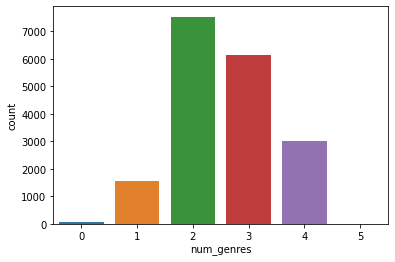

In [43]:
#how many genres in our podcasts
sns.countplot(df.num_genres)

In [44]:
#convert the genre scores columns to binaries if a genre is present in the podcast or not
df.loc[df['sports_score'] > 0, 'sports_genre'] = 1
df.loc[df['sports_score'] == 0, 'sports_genre'] = 0
df.loc[df['news_score'] > 0, 'news_genre'] = 1
df.loc[df['news_score'] == 0, 'news_genre'] = 0
df.loc[df['education_score'] > 0, 'education_genre'] = 1
df.loc[df['education_score'] == 0, 'education_genre'] = 0
df.loc[df['health_score'] > 0, 'health_genre'] = 1
df.loc[df['health_score'] == 0, 'health_genre'] = 0
df.loc[df['lifestyle_score'] > 0, 'lifestyle_genre'] = 1
df.loc[df['lifestyle_score'] == 0, 'lifestyle_genre'] = 0
df.loc[df['vehicles_score'] > 0, 'vehicles_genre'] = 1
df.loc[df['vehicles_score'] == 0, 'vehicles_genre'] = 0
df.loc[df['business_score'] > 0, 'business_genre'] = 1
df.loc[df['business_score'] == 0, 'business_genre'] = 0
df.loc[df['art_score'] > 0, 'art_genre'] = 1
df.loc[df['art_score'] == 0, 'art_genre'] = 0
df.loc[df['religion_score'] > 0, 'religion_genre'] = 1
df.loc[df['religion_score'] == 0, 'religion_genre'] = 0
df.loc[df['tv_score'] > 0, 'tv_genre'] = 1
df.loc[df['tv_score'] == 0, 'tv_genre'] = 0
df.loc[df['comedy_score'] > 0, 'comedy_genre'] = 1
df.loc[df['comedy_score'] == 0, 'comedy_genre'] = 0
df.loc[df['science_score'] > 0, 'science_genre'] = 1
df.loc[df['science_score'] == 0, 'science_genre'] = 0
df.loc[df['nature_score'] > 0, 'nature_genre'] = 1
df.loc[df['nature_score'] == 0, 'nature_genre'] = 0
df.loc[df['kids_score'] > 0, 'kids_genre'] = 1
df.loc[df['kids_score'] == 0, 'kids_genre'] = 0
df.loc[df['history_score'] > 0, 'history_genre'] = 1
df.loc[df['history_score'] == 0, 'history_genre'] = 0
df.loc[df['games_score'] > 0, 'games_genre'] = 1
df.loc[df['games_score'] == 0, 'games_genre'] = 0
df.loc[df['documentary_score'] > 0, 'documentary_genre'] = 1
df.loc[df['documentary_score'] == 0, 'documentary_genre'] = 0

In [45]:
#convert to integers
genre_cols = ['sports_genre', 'news_genre', 'education_genre', 'health_genre', 'lifestyle_genre','vehicles_genre',
              'business_genre', 'art_genre', 'religion_genre', 'tv_genre', 'comedy_genre','science_genre',
              'nature_genre', 'kids_genre', 'history_genre', 'games_genre', 'documentary_genre']

for col in genre_cols:
    df[col] = df[col].apply(int)

In [46]:
len(genre_cols)

17

###  Number and percent of podcasts in each genre

In [47]:
#genre_cols
len(genre_cols)

17

In [48]:
#list of our main genres
genre_cols = ['sports_genre', 'news_genre', 'education_genre', 'health_genre', 'lifestyle_genre','vehicles_genre',
              'business_genre', 'art_genre', 'religion_genre', 'tv_genre', 'comedy_genre','science_genre',
              'nature_genre', 'kids_genre', 'history_genre', 'games_genre', 'documentary_genre']
#get average of podcasts in each genre
rows = [[genre, int(df[genre].sum()), round(df[genre].mean(), 2)] for genre in genre_cols]
average_genres_df = pd.DataFrame(rows, columns = ['Genre','Number','Percent'])
average_genres_df.sort_values('Number', ascending = False)

Genre  Number  Percent
4     lifestyle_genre    4079     0.22
7           art_genre    3177     0.17
0        sports_genre    2739     0.15
1          news_genre    2420     0.13
11      science_genre    2083     0.11
6      business_genre    2034     0.11
2     education_genre    2002     0.11
3        health_genre    1984     0.11
9            tv_genre    1719     0.09
10       comedy_genre    1503     0.08
8      religion_genre    1471     0.08
13         kids_genre    1072     0.06
14      history_genre     938     0.05
12       nature_genre     665     0.04
16  documentary_genre     543     0.03
15        games_genre     514     0.03
5      vehicles_genre     368     0.02

### Podcast names and genres

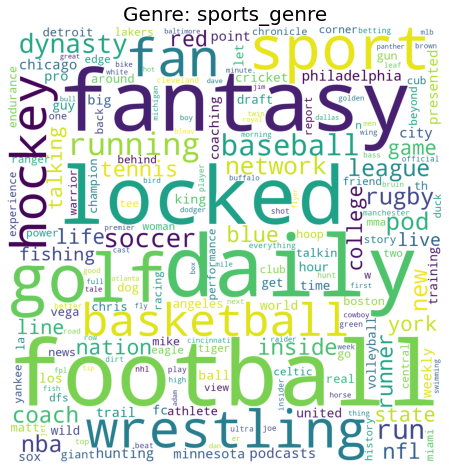

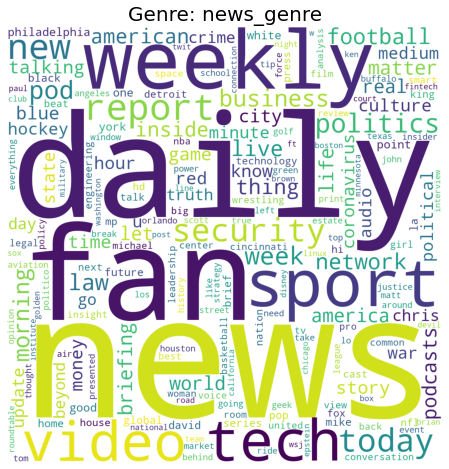

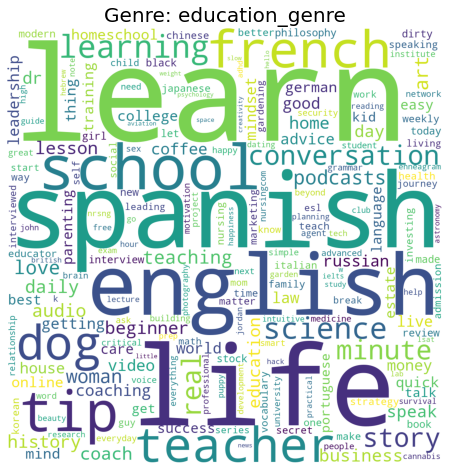

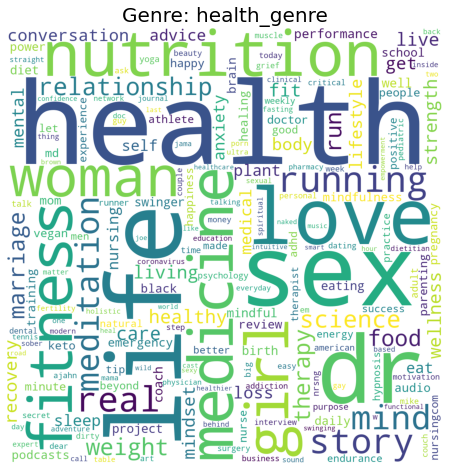

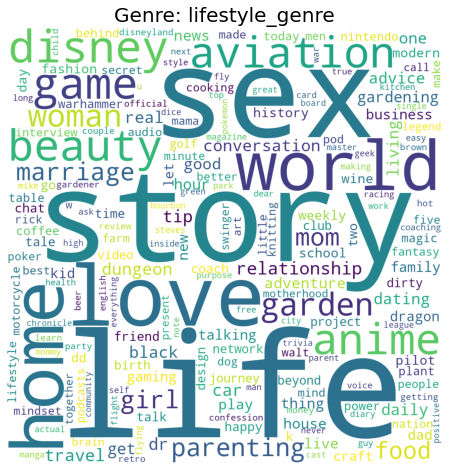

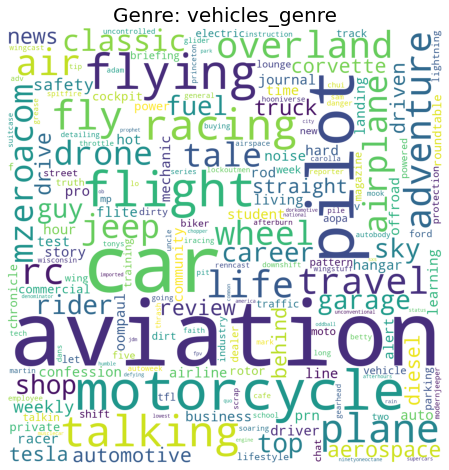

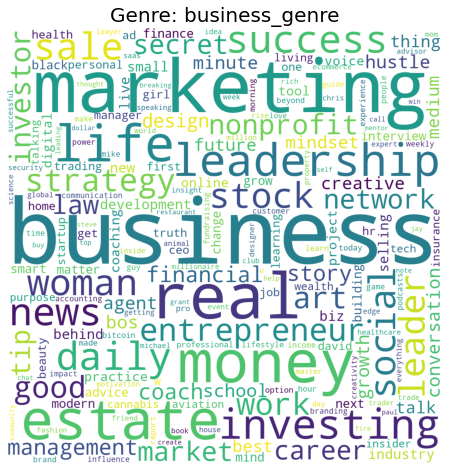

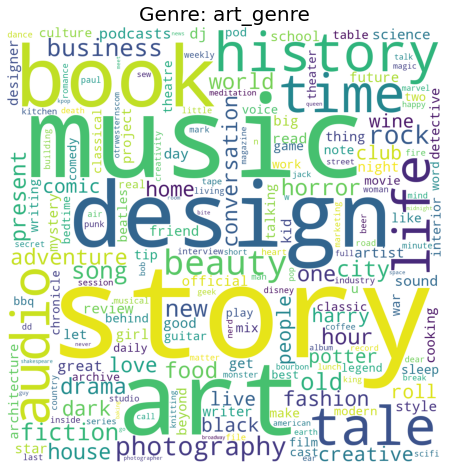

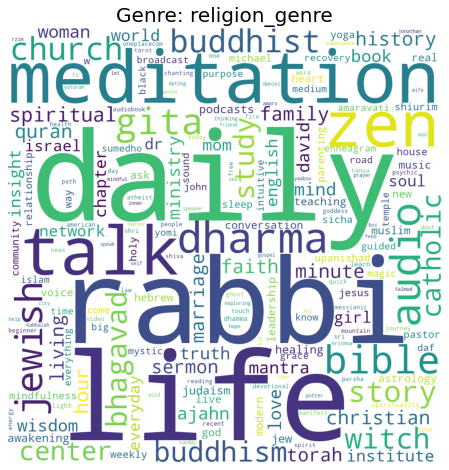

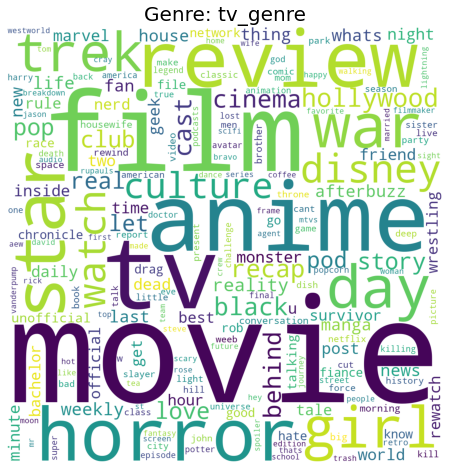

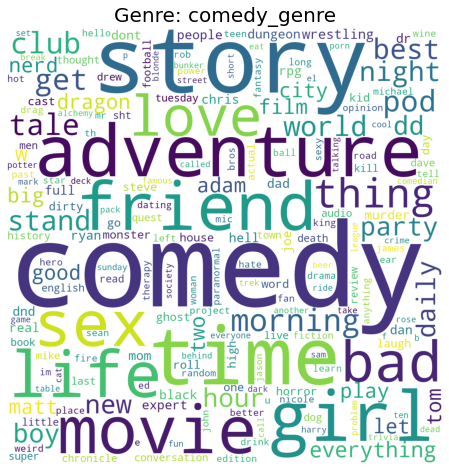

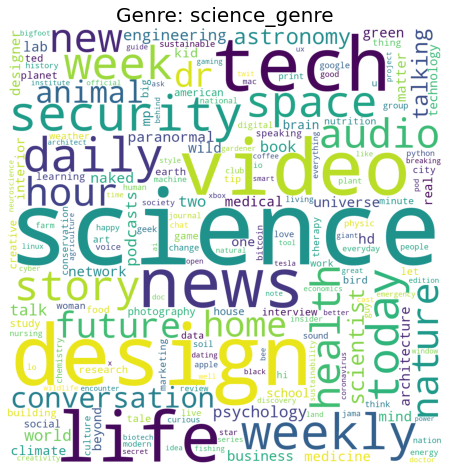

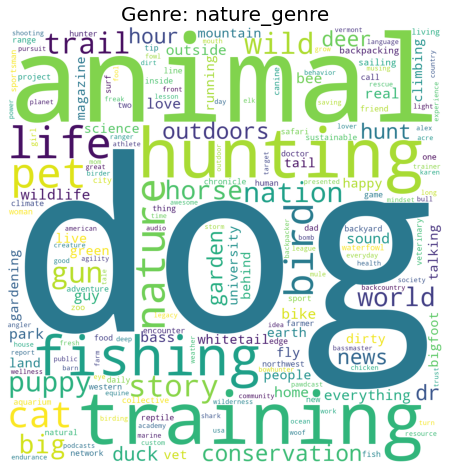

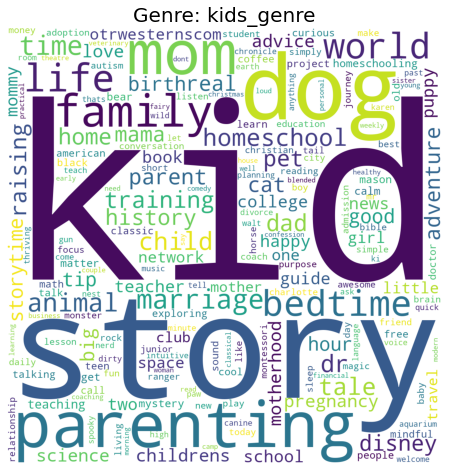

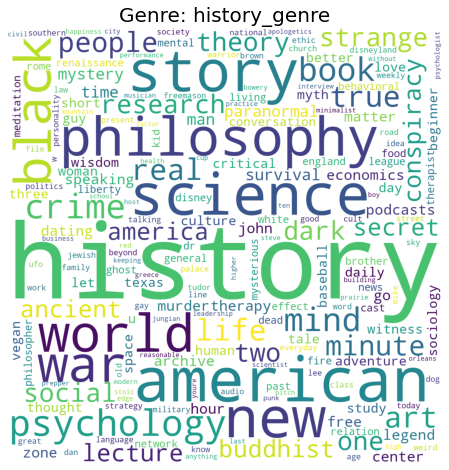

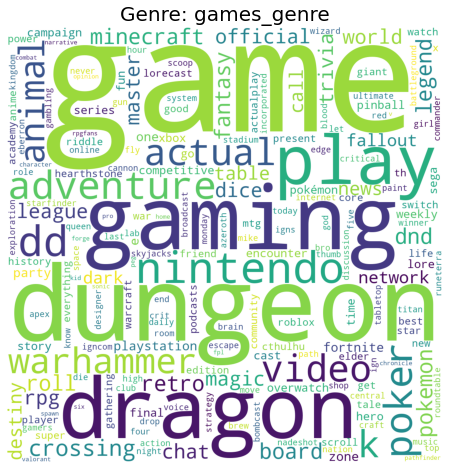

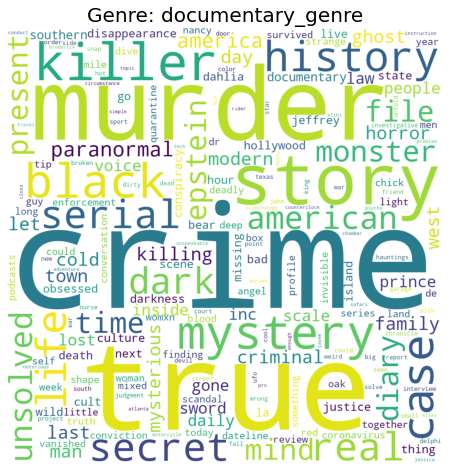

In [49]:
#how do the titles vary by genre?
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['podcast', 'show', 'radio', 'talk'])
for genre in genre_cols:
    #list of all words in podcast names
    all_words_names = df.loc[df[genre] == 1, ['name_tok']].sum(axis = 1)
    all_words_names = all_words_names.sum()
    counted_words_names = collections.Counter(all_words_names)
    #make a wordcloud of most common words in podcast titles
    from wordcloud import WordCloud
    titles_wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate_from_frequencies(counted_words_names)
    plt.figure(figsize=(8,8))
    plt.imshow(titles_wordcloud)
    plt.title('Genre: {}'.format(genre), fontsize = 20)
    plt.axis("off")
    plt.savefig('{}.png'.format(genre))
    plt.show()

## Exploring ratings

### Average rating

In [50]:
#statistics for average rating
df.avg_rating.describe()

count    18289.000000
mean         4.556466
std          0.941230
min          0.000000
25%          4.600000
50%          4.800000
75%          5.000000
max          5.000000
Name: avg_rating, dtype: float64

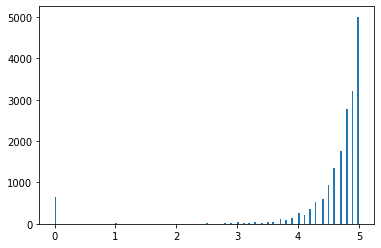

In [51]:
# distribution of ratings
plt.hist(df.avg_rating, bins = 'auto');

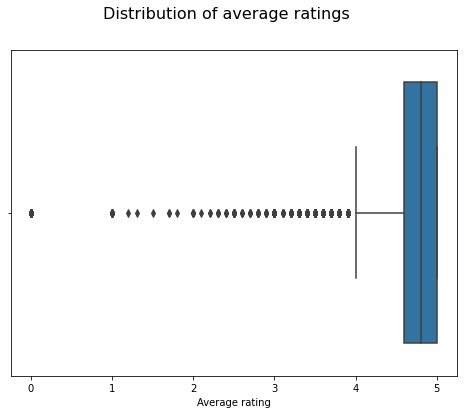

In [52]:
#boxplot of average rating
plt.figure(figsize = (8,6));
sns.boxplot(x = df.avg_rating);
plt.suptitle('Distribution of average ratings', fontsize=16);
plt.xlabel('Average rating')
plt.savefig('Average_rating.jpg')

In [53]:
#how many podcasts have the maximum rating?
df[df.avg_rating == 5.0].shape[0]

5010

In [54]:
#how many podcasts have rating = 0
df[df.avg_rating == 0.0].shape[0]

645

In [55]:
#explore some of the podcasts with rating 0
df[df.avg_rating == 0.0].head(5)

podcast_id                                 name   
13  1508618603                  By Projection Light  \
29  1448134424                   History of Cricket   
30  1504874143                    À Guichets Fermés   
35  1504641401        Yorkshire Cricket: Covers Off   
72  1513843162  Isha Upanishad – Arsha Bodha Center   

                                               genres              author   
13          ['Film History', 'Podcasts', 'TV & Film']     Gabriela Masson  \
29       ['Cricket', 'Podcasts', 'Sports', 'History']    historyofcricket   
30                 ['Stand-Up', 'Podcasts', 'Comedy']        What The Fun   
35        ['Cricket', 'Podcasts', 'Sports', 'Comedy']       Yorkshire CCC   
72  ['Hinduism', 'Podcasts', 'Religion & Spiritual...  Swami Tadatmananda   

                                          description content_rating   
13  A podcast in which the cinema of the 1930s to ...          clean  \
29  This podcast is the History of Cricket, starti...          clean   
30  Le Podcast des humoristes sans public.  50' et...          clean   
35  For lovers of cricket, Yorkshire and banter, o...          clean   
72  Teaching of Spiritual Teachings of Ancient Ind...          clean   

    avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
13         0.0            0                  0                  0  \
29         0.0            0                  0                  0   
30         0.0            0                  0                  0   
35         0.0            0                  0                  0   
72         0.0            0                  0                  0   

    num_ratings_3star  num_ratings_4star  num_ratings_5star   
13                  0                  0                  0  \
29                  0                  0                  0   
30                  0                  0                  0   
35                  0                  0                  0   
72                  0                  0                  0   

                                        episode_names   
13  ['2. Audacious Audrey', 'Mini Trailer for Auda...  \
29  ['1937 - Womens series - Australia raise the b...   
30  ['Episode 13 - Sum', 'Episode 12 - François Gu...   
35  ['#11 - Will-ey be any good?!', '#10 - Brez in...   
72  ['Isha Upanishad Mantra 15-18', 'Isha Upanisha...   

                                 episode_descriptions   
13  ['This week, Gabriela talks about not one but ...  \
29  ['Peggy Antonio, a girl from the wrong end of ...   
30  ["Dans ce treizième épisode, Raph et Rudy reço...   
35  ['On the day that would have been the Game of ...   
72  ['The post Isha Upanishad Mantra 15-18 appeare...   

                                    episode_durations   
13                   [2678000, 79000, 4607000, 61000]  \
29  [1132000, 1683000, 1527000, 1699000, 1411000, ...   
30  [3067000, 3024000, 3008000, 3132000, 2957000, ...   
35  [2594000, 2881000, 3206000, 3207000, 2426000, ...   
72  [3777000, 3835000, 3821000, 4136000, 4002000, ...   

                                        episode_dates  num_episodes_sample   
13  ['2020-05-16T06:15:00.000Z', '2020-05-09T06:10...                    4  \
29  ['2020-06-08T06:19:45.000Z', '2020-05-31T18:47...                    6   
30  ['2020-06-07T11:00:00.000Z', '2020-05-31T11:00...                    6   
35  ['2020-06-04T08:00:00.000Z', '2020-06-01T07:00...                    6   
72  ['2011-11-15T14:00:01.000Z', '2011-11-08T14:00...                    6   

   review_ratings review_titles reviews review_dates  num_reviews_sample   
13             []            []      []           []                   0  \
29             []            []      []           []                   0   
30             []            []      []           []                   0   
35             []            []      []           []                   0   
72             []            []      []           []                   0   

   description_lang         

### Number of ratings

In [56]:
#statistics for the number of ratings
df.num_ratings.describe()

count     18289.000000
mean        532.281207
std        2713.397471
min           0.000000
25%          11.000000
50%          50.000000
75%         222.000000
max      121651.000000
Name: num_ratings, dtype: float64

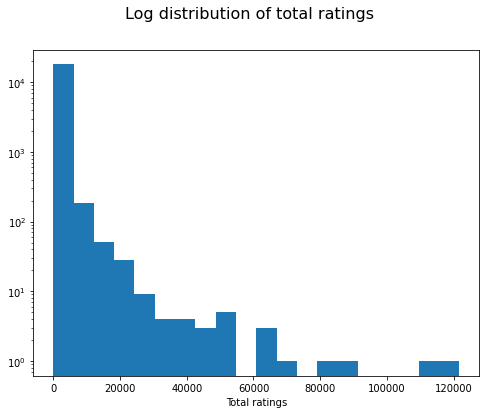

In [57]:
#distribution of the number of ratings
plt.figure(figsize = (8,6));
plt.hist(df.num_ratings, bins = 20);
plt.yscale('log')
plt.suptitle('Log distribution of total ratings', fontsize=16);
plt.xlabel('Total ratings')
plt.savefig('Log_total_rating.jpg')

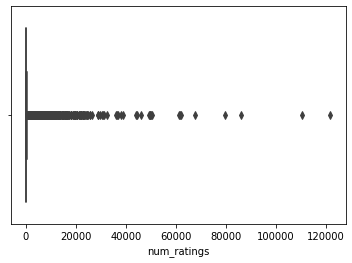

In [58]:
#boxplot of number of ratings
sns.boxplot(x= df.num_ratings);

In [59]:
#how many podcasts have 0 ratings?
df[df.num_ratings == 0].shape[0]

645

In [60]:
#top 10 podcasts with most ratings
df.sort_values('num_ratings', ascending = False).head(20)[['name', 'num_ratings']]

name  num_ratings
4681   My Favorite Murder with Karen Kilgariff and Ge...       121651
11022                                     Call Her Daddy       110424
925                                 The Ben Shapiro Show        85824
7505                                           Dr. Death        79600
12653                                     Pardon My Take        67657
565                                            The Daily        61806
13820                                   Pod Save America        61730
4598              VIEWS with David Dobrik and Jason Nash        61006
3456                                     Up and Vanished        50491
16839                   Armchair Expert with Dax Shepard        49810
15959                              Stuff You Should Know        49621
2142                                 Revisionist History        49466
13522                                The Misfits Podcast        49175
15817                                  Small Town Murder        45826
17274                                    Sword and Scale        44398
6688                            Last Podcast On The Left        43840
13564                                         Dirty John        38775
17503                                             S-Town        38077
14472                                               Lore        36919
19482                       Conan O’Brien Needs A Friend        36506

In [61]:
#podcasts with most 1 star ratings
df.sort_values('num_ratings_1star', ascending = False).head(20)[['name', 'num_ratings_1star']]

name  num_ratings_1star
925                                 The Ben Shapiro Show               7182
17274                                    Sword and Scale               7015
11022                                     Call Her Daddy               5446
4681   My Favorite Murder with Karen Kilgariff and Ge...               5086
13820                                   Pod Save America               3931
565                                            The Daily               3116
3456                                     Up and Vanished               2687
6688                            Last Podcast On The Left               2230
15959                              Stuff You Should Know               2195
818           The Ben and Ashley I Almost Famous Podcast               2088
14472                                               Lore               1993
18713                                  Adam Carolla Show               1940
7912                                                1619               1814
18936                    Scheananigans with Scheana Shay               1662
12104                         Impaulsive with Logan Paul               1615
27                                       Atlanta Monster               1604
2142                                 Revisionist History               1518
16500                           The Bill Simmons Podcast               1509
15474                  Stuff You Missed in History Class               1506
17503                                             S-Town               1501

In [62]:
#podcasts with most 5 star ratings
df.sort_values('num_ratings_5star', ascending = False).head(20)[['name', 'num_ratings_5star']]

name  num_ratings_5star
4681   My Favorite Murder with Karen Kilgariff and Ge...             107482
11022                                     Call Her Daddy             101137
925                                 The Ben Shapiro Show              74268
7505                                           Dr. Death              73757
12653                                     Pardon My Take              64910
4598              VIEWS with David Dobrik and Jason Nash              58152
13820                                   Pod Save America              52609
565                                            The Daily              49606
13522                                The Misfits Podcast              48268
15817                                  Small Town Murder              44131
2142                                 Revisionist History              42447
16839                   Armchair Expert with Dax Shepard              42149
15959                              Stuff You Should Know              39214
6688                            Last Podcast On The Left              38412
3456                                     Up and Vanished              37536
19482                       Conan O’Brien Needs A Friend              33233
14443                                               Cold              32721
17274                                    Sword and Scale              31689
17503                                             S-Town              31143
14472                                               Lore              30726

### Total positive ratings

We define "positive ratings" as 4 or 5 stars

In [63]:
df['total_pos_ratings'] = df['num_ratings_4star'] + df['num_ratings_5star']

In [64]:
#podcasts with most positive ratings
df.sort_values('total_pos_ratings', ascending = False).head(20)[['name', 'total_pos_ratings']]

name  total_pos_ratings
4681   My Favorite Murder with Karen Kilgariff and Ge...             111943
11022                                     Call Her Daddy             103085
7505                                           Dr. Death              76888
925                                 The Ben Shapiro Show              76503
12653                                     Pardon My Take              65588
4598              VIEWS with David Dobrik and Jason Nash              59304
13820                                   Pod Save America              55371
565                                            The Daily              54321
13522                                The Misfits Podcast              48563
16839                   Armchair Expert with Dax Shepard              45922
2142                                 Revisionist History              45374
15817                                  Small Town Murder              44591
15959                              Stuff You Should Know              43693
3456                                     Up and Vanished              43022
6688                            Last Podcast On The Left              40042
13564                                         Dirty John              35076
19482                       Conan O’Brien Needs A Friend              34622
17274                                    Sword and Scale              34525
14443                                               Cold              34334
17503                                             S-Town              34177

In [65]:
df.total_pos_ratings.describe()

count     18289.000000
mean        489.772869
std        2508.848210
min           0.000000
25%          10.000000
50%          45.000000
75%         204.000000
max      111943.000000
Name: total_pos_ratings, dtype: float64

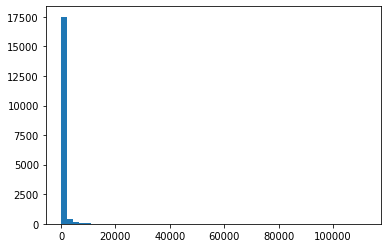

In [66]:
#distribution of positive ratings
plt.hist(df.total_pos_ratings, bins = 50);

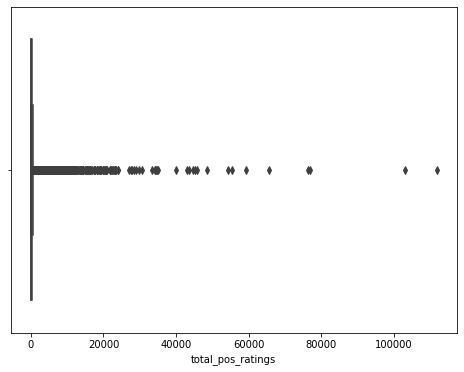

In [67]:
#boxplot
plt.figure(figsize = (8,6))
sns.boxplot(df.total_pos_ratings);

In [68]:
df[df.total_pos_ratings > 10000].shape[0]

142

### Log of positive ratings

In [69]:
#take the log of positive ratings
df['log_pos_ratings'] = np.log10(df['total_pos_ratings'] +1)

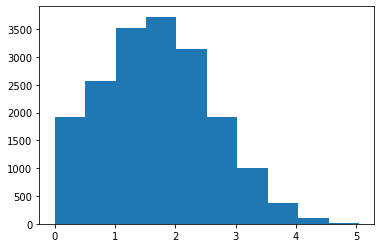

In [70]:
#plot the histogram
plt.hist(df.log_pos_ratings);

In [71]:
df.log_pos_ratings.describe()

count    18289.000000
mean         1.703870
std          0.908060
min          0.000000
25%          1.041393
50%          1.662758
75%          2.311754
max          5.049001
Name: log_pos_ratings, dtype: float64

### Ratings categories

We will use this as the basis to create positive ratings categories: very low, low, medium, high and very high.
* 0 - 1 : Low
* 1 - 2: Medium
* 2-4: High
* 4+: Very high

In [72]:
df.loc[df.log_pos_ratings <= 1, 'ratings_cat'] = 'low'
df.loc[((df.log_pos_ratings >1) & (df.log_pos_ratings <= 2)), 'ratings_cat'] = 'medium'
df.loc[((df.log_pos_ratings >2) & (df.log_pos_ratings <= 4)), 'ratings_cat'] = 'high'
df.loc[df.log_pos_ratings > 4, 'ratings_cat'] = 'very high'

In [73]:
df.ratings_cat.value_counts()

ratings_cat
medium       7126
high         6531
low          4490
very high     142
Name: count, dtype: int64

### Ratings 3 categories

In [74]:
df.loc[df.total_pos_ratings <= 100, 'ratings_categories'] = 'low'
df.loc[((df.total_pos_ratings >100) & (df.total_pos_ratings <= 5000)), 'ratings_categories'] = 'medium'
df.loc[df.total_pos_ratings > 5000, 'ratings_categories'] = 'high'

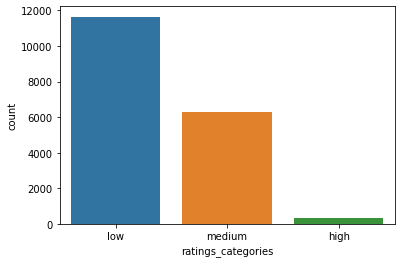

In [75]:
sns.countplot(df.ratings_categories);

In [76]:
df.ratings_categories.value_counts()

ratings_categories
low       11644
medium     6314
high        331
Name: count, dtype: int64

### Ratings 2 categories

In [77]:
df.loc[df.total_pos_ratings <= 1000, 'popularity_cat'] = 'low'
df.loc[df.total_pos_ratings > 1000, 'popularity_cat'] = 'high'

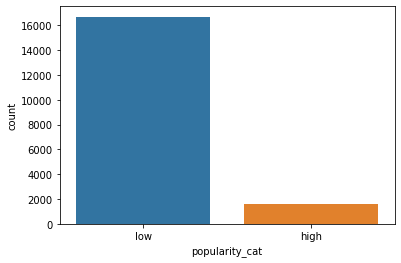

In [78]:
sns.countplot(df.popularity_cat);

### Total stars

In [79]:
#define a total stars given to the podcasts: number of ratings in each category * number of stars
df['total_stars'] = (df['num_ratings_1star'] + 2*df['num_ratings_2star'] + 3*df['num_ratings_3star'] +
4* df['num_ratings_4star'] + 5*df['num_ratings_5star'])
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

In [80]:
#podcasts with most stars
df.sort_values('total_stars', ascending = False).head(20)[['name', 'total_stars']]

name  total_stars
4681   My Favorite Murder with Karen Kilgariff and Ge...       572159
11022                                     Call Her Daddy       523863
925                                 The Ben Shapiro Show       392869
7505                                           Dr. Death       387063
12653                                     Pardon My Take       330496
4598              VIEWS with David Dobrik and Jason Nash       298526
13820                                   Pod Save America       284233
565                                            The Daily       281244
13522                                The Misfits Podcast       243513
16839                   Armchair Expert with Dax Shepard       233966
2142                                 Revisionist History       232085
15959                              Stuff You Should Know       225849
3456                                     Up and Vanished       224756
15817                                  Small Town Murder       224469
6688                            Last Podcast On The Left       204794
17274                                    Sword and Scale       184001
13564                                         Dirty John       178321
19482                       Conan O’Brien Needs A Friend       175527
17503                                             S-Town       175457
14443                                               Cold       173252

### Total stars squared

Let's also calculate the number of stars "squared" to give a higher weighting to the podcasts that are rated with more stars.

In [81]:
df['total_stars_sq'] = (df['num_ratings_1star'] + 4*df['num_ratings_2star'] + 9*df['num_ratings_3star'] +
16* df['num_ratings_4star'] + 25*df['num_ratings_5star'])

In [82]:
#most popular podcasts by stars squared
df.sort_values('total_stars_sq', ascending = False).head(20)[['name', 'total_stars_sq']]

name  total_stars_sq
4681   My Favorite Murder with Karen Kilgariff and Ge...         2794875
11022                                     Call Her Daddy         2578381
925                                 The Ben Shapiro Show         1913843
7505                                           Dr. Death         1908197
12653                                     Pardon My Take         1640014
4598              VIEWS with David Dobrik and Jason Nash         1479396
13820                                   Pod Save America         1379825
565                                            The Daily         1348682
13522                                The Misfits Podcast         1213453
16839                   Armchair Expert with Dax Shepard         1133994
2142                                 Revisionist History         1127201
15817                                  Small Town Murder         1114605
15959                              Stuff You Should Know         1080151
3456                                     Up and Vanished         1062396
6688                            Last Podcast On The Left          999122
17274                                    Sword and Scale          863453
19482                       Conan O’Brien Needs A Friend          862131
13564                                         Dirty John          852497
14443                                               Cold          851774
17503                                             S-Town          844751

### Popularity Score

When we measure popularity by "total stars", all the ratings given are counting towards the popularity of a podcast. However, this does not seem to match our intuition of how ratings work. 
* Giving a rating of 1 or 2 stars to something, I am saying that I actively dislike it. 
* Giving it 3 stars, I am probably neutral
* Giving it 4 or 5 stars, I like it.  
* So the 1 or 2 star ratings should  count negatively towards our measure of podcast popularity.

In [83]:
#create a popularity score for podcasts where 1/2 star ratings count negatively
df['popularity_score'] = (-2*df['num_ratings_1star'] -df['num_ratings_2star'] + df['num_ratings_3star']
                          + 2*df['num_ratings_4star'] + 3*df['num_ratings_5star'])

In [84]:
#podcasts with heighest popularity score
df.sort_values('popularity_score', ascending = False).head(20)[['name', 'popularity_score']]

name  popularity_score
4681   My Favorite Murder with Karen Kilgariff and Ge...            321724
11022                                     Call Her Daddy            296830
7505                                           Dr. Death            226320
925                                 The Ben Shapiro Show            213029
12653                                     Pardon My Take            193539
4598              VIEWS with David Dobrik and Jason Nash            175359
13820                                   Pod Save America            155767
565                                            The Daily            152647
13522                                The Misfits Podcast            144690
16839                   Armchair Expert with Dax Shepard            132103
15817                                  Small Town Murder            131841
2142                                 Revisionist History            130537
15959                              Stuff You Should Know            122881
3456                                     Up and Vanished            119186
6688                            Last Podcast On The Left            114164
19482                       Conan O’Brien Needs A Friend            101347
14443                                               Cold            100806
13564                                         Dirty John             98657
17503                                             S-Town             96710
14472                                               Lore             93700

In [85]:
#podcasts with lowest popularity score
df.sort_values('popularity_score').head(20)[['name', 'popularity_score']]

name  popularity_score
16485                               Call Her Daddy Venom             -2524
1802                                  The Greg Hill Show              -270
6883                                        ABRAHAM GALS               -98
10838                                           ReplyAll               -80
7188                     The Top Chef After Show Podcast               -10
19120  Locked On 76ers - Daily Podcast On The Philade...                -9
5885                                         Short Story                -9
8302                                 John Oliver Podcast                -8
15190  The Sexiest Voice ASMR - Erotic Audio For Wome...                -7
4808                                     Stand Up Comedy                -6
6708                                    TheRealSip&Spill                -5
11236  Children's Stories with Grandma: for Bedtime, ...                -5
6541            True Crimes in Texas - Unsolved & Solved                -4
6392                                       Zonal Marking                -4
14481                                          TikTokPod                -4
8092   Locked On Devils - Daily Podcast On The New Je...                -4
6691                    Supernatural With Ashley Flowers                -4
12371                                The No Good Podcast                -4
6789                                           Ballbhoys                -3
10376  African Folktales: Traditional Bedtime Stories...                -2

### Ratings by genre

#### Average rating by genre

In [86]:
#build list of average rating score in each genre
rows = [[genre, df['avg_rating'].loc[df[genre] == 1.0].mean()] for genre in genre_cols]
#build dataframe
average_rating_genres_df = pd.DataFrame(rows, columns = ['Genre','Average_Rating'])
average_rating_genres_df.sort_values('Average_Rating', ascending = False)

Genre  Average_Rating
15        games_genre        4.742023
3        health_genre        4.688407
4     lifestyle_genre        4.627874
10       comedy_genre        4.623287
14      history_genre        4.615245
2     education_genre        4.609491
6      business_genre        4.603441
7           art_genre        4.589298
16  documentary_genre        4.557459
0        sports_genre        4.550018
5      vehicles_genre        4.544565
1          news_genre        4.541653
9            tv_genre        4.532054
8      religion_genre        4.483209
13         kids_genre        4.479851
11      science_genre        4.475036
12       nature_genre        4.462857

#### Average stars by genre

In [87]:
#build list of average popularity score in each genre
rows = [[genre, round(df['total_stars'].loc[df[genre] == 1.0].mean(),0)] for genre in genre_cols]
#build dataframe
average_pop_genres_df = pd.DataFrame(rows, columns = ['Genre','Average_Stars'])
average_pop_genres_df.sort_values('Average_Stars', ascending = False)

Genre  Average_Stars
16  documentary_genre        13059.0
10       comedy_genre         6627.0
14      history_genre         4004.0
1          news_genre         3016.0
15        games_genre         2366.0
9            tv_genre         2109.0
4     lifestyle_genre         1880.0
3        health_genre         1768.0
8      religion_genre         1767.0
7           art_genre         1661.0
2     education_genre         1614.0
0        sports_genre         1568.0
6      business_genre         1483.0
13         kids_genre         1277.0
12       nature_genre         1196.0
11      science_genre         1131.0
5      vehicles_genre          471.0

#### Average positive ratings by genre

In [88]:

#build list of average popularity score in each genre
rows = [[genre, round(df['total_pos_ratings'].loc[df[genre] == 1.0].mean(),0)] for genre in genre_cols]
#build dataframe
average_pos_ratings_genres_df = pd.DataFrame(rows, columns = ['Genre','Average_Positive_Ratings'])
average_pos_ratings_genres_df.sort_values('Average_Positive_Ratings', ascending = False)

Genre  Average_Positive_Ratings
16  documentary_genre                    2541.0
10       comedy_genre                    1306.0
14      history_genre                     783.0
1          news_genre                     589.0
15        games_genre                     469.0
9            tv_genre                     412.0
4     lifestyle_genre                     369.0
8      religion_genre                     349.0
3        health_genre                     347.0
7           art_genre                     326.0
2     education_genre                     317.0
0        sports_genre                     308.0
6      business_genre                     292.0
13         kids_genre                     249.0
12       nature_genre                     237.0
11      science_genre                     221.0
5      vehicles_genre                      93.0

## Content rating

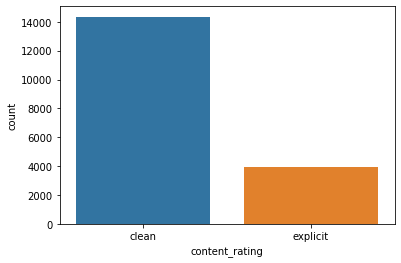

In [89]:
sns.countplot(df.content_rating);

### Ratings by content rating

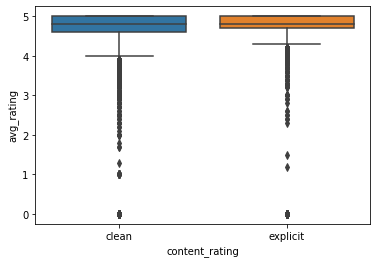

In [90]:
sns.boxplot(x = 'content_rating', y =  'avg_rating', data = df);

In [91]:
#average rating for "clean vs. explicit" podcasts
print('AVERAGE RATINGS:')
print('Average rating clean podcasts: {:.2f}'.format(df.avg_rating[df.content_rating == 'clean'].mean()))
print('Average rating explicit podcasts: {:.2f}'.format(df.avg_rating[df.content_rating == 'explicit'].mean()))
print('')
print('NO. OF STARS')
print('Average no. of stars clean podcasts: {:.2f}'.format(df.total_stars[df.content_rating == 'clean'].mean()))
print('Average no. of stars explicit podcasts: {:.2f}'.format(df.total_stars[df.content_rating == 'explicit'].mean()))


AVERAGE RATINGS:
Average rating clean podcasts: 4.53
Average rating explicit podcasts: 4.64

NO. OF STARS
Average no. of stars clean podcasts: 1932.30
Average no. of stars explicit podcasts: 4563.07


It seems the explicit podcasts are more popular than the clean podcasts on average.

In [92]:
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

## Podcast author

In [93]:
#check for empty strings
df[df.author == '']

Empty DataFrame
Columns: [podcast_id, name, genres, author, description, content_rating, avg_rating, num_ratings, num_ratings_1star, num_ratings_2star, num_ratings_3star, num_ratings_4star, num_ratings_5star, episode_names, episode_descriptions, episode_durations, episode_dates, num_episodes_sample, review_ratings, review_titles, reviews, review_dates, num_reviews_sample, description_lang, name_clean, name_tok, genre_scores, sports_score, news_score, education_score, health_score, lifestyle_score, vehicles_score, business_score, art_score, religion_score, tv_score, comedy_score, science_score, nature_score, kids_score, history_score, games_score, documentary_score, num_genres, sports_genre, news_genre, education_genre, health_genre, lifestyle_genre, vehicles_genre, business_genre, art_genre, religion_genre, tv_genre, comedy_genre, science_genre, nature_genre, kids_genre, history_genre, games_genre, documentary_genre, total_pos_ratings, log_pos_ratings, ratings_cat, ratings_categories, popularity_cat, total_stars, total_stars_sq, popularity_score]
Index: []

In [94]:
#check for duplicates
df.author.duplicated().sum()

2836

In [95]:
#get list of duplicate authors
duplicate_authors = df.author[df.author.duplicated()]
duplicate_authors

52                     247Sports
106       Beautiful Game Network
111                    Blue Wire
121               Muslim Central
178                  BBC Radio 4
                  ...           
19527                  LSG Media
19538                  Bloomberg
19544     Coffee Break Languages
19550    NBC Sports Philadelphia
19553               Strong Towns
Name: author, Length: 2836, dtype: object

In [96]:
#find most common authors
df.author.value_counts().head(20)

author
AfterBuzz TV                  103
The Athletic                   84
iHeartRadio                    71
SB Nation                      52
TWiT                           51
BBC Radio 4                    41
Blue Wire                      37
Muslim Central                 36
PodcastOne                     35
WNYC Studios                   30
Fun Kids                       29
Wondery                        29
Parcast Network                26
Swami Guruparananda            25
Studio71                       24
Dear Media                     24
PodcastOne / Hubbard Radio     24
Barstool Sports                23
BBC World Service              23
Gimlet                         22
Name: count, dtype: int64

### Finding authors who are persons

We will try a very basic method to identify some of the authors who are persons (rather than organizations or companies) using named entity recognition.

In [97]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [98]:
def find_persons(text):
    doc = nlp(text)
    label_list = [ent.label_ for ent in doc.ents]
    if 'PERSON' in label_list:
        return 'Person'
    else:
        return 'Not Person'

In [99]:
df['author_type'] = df.author.apply(find_persons)

In [100]:
df['author'][df.author_type == 'Person'][:20]

2                                          Chuck Fulton
8                                         Mike Phillips
11                            LeVar Burton and Stitcher
13                                      Gabriela Masson
14                            Thyroid Lifestyle Support
15                    Mia Birdsong, The Nation Magazine
16                                            Sam Feldt
18                                         Nicole Jakob
20                                         Kono Vidovic
22                                       Chris Moncrief
23                        Jason Newland - FREE Hypnosis
25                                          Tevin McGee
26                                          Chris Stone
32                                       Bobby Mitchell
35                                        Yorkshire CCC
37                       Matthew Blake / Karyn Thurston
38                                          Scott Wells
39                                       Nadia T

We can see that this method works pretty well, although it is not perfect.

In [101]:
df.author_type.value_counts()

author_type
Not Person    9994
Person        8295
Name: count, dtype: int64

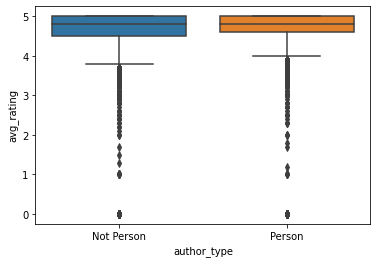

In [102]:
#distribution of average ratings for podcasts where the author is a person vs. not a person
sns.boxplot(x = 'author_type', y =  'avg_rating', data = df);

In [103]:
#average rating for "person vs. non-person" authored podcasts
print('AVERAGE RATINGS:')
print('Average rating person-author podcasts: {:.2f}'.format(df.avg_rating[df.author_type == 'Person'].mean()))
print('Average rating non-person-author podcasts: {:.2f}'.format(df.avg_rating[df.author_type == 'Not Person'].mean()))
print('')
print('NO. OF STARS')
print('Average no. of stars person-author podcasts: {:.2f}'.format(df.total_stars[df.author_type == 'Person'].mean()))
print('Average no. of stars non-person-author podcasts: {:.2f}'.format(df.total_stars[df.author_type == 'Not Person'].mean()))


AVERAGE RATINGS:
Average rating person-author podcasts: 4.57
Average rating non-person-author podcasts: 4.55

NO. OF STARS
Average no. of stars person-author podcasts: 1916.88
Average no. of stars non-person-author podcasts: 2983.04


### Gender of authors

In [104]:
import gender_guesser.detector as gender
d = gender.Detector()

def get_author_gender (author):
    #for simplicity, we will take the first word in the "author" string to guess the gender from.
    author_words = author.split(' ')
    first_name = author_words[0]
    return d.get_gender(first_name)

In [105]:
#apply our function
df['author_gender'] = df['author'].apply(get_author_gender)
#remove the ones where author is not a person
df['author_gender'].where(df.author_type != 'Not Person', 'NA', inplace=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'NA'),
  Text(1, 0, 'male'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'female'),
  Text(4, 0, 'mostly_male'),
  Text(5, 0, 'mostly_female'),
  Text(6, 0, 'andy')])

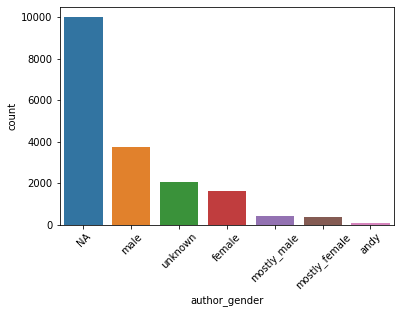

In [106]:
#explore the authors by gender
sns.countplot(df.author_gender);
plt.xticks(rotation = 45)

In [107]:
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

## Number of episodes in sample

This is the number of episodes for which we scraped information in our sample.

In [108]:
df.num_episodes_sample.value_counts()

num_episodes_sample
6    16575
3      355
5      353
4      351
2      344
1      311
Name: count, dtype: int64

## Episode durations

In [109]:
#function to get average episode duration
import ast

def get_avg_duration(ep_durations):
    #convert str to list
    ep_durations_lst = ast.literal_eval(ep_durations)
    try:
        avg_duration = sum(ep_durations_lst) / len(ep_durations_lst)
        return avg_duration
    except:
        return np.nan

In [110]:
df['avg_episode_duration'] = df.episode_durations.apply(get_avg_duration)

In [111]:
df['avg_episode_duration'].isna().sum()

428

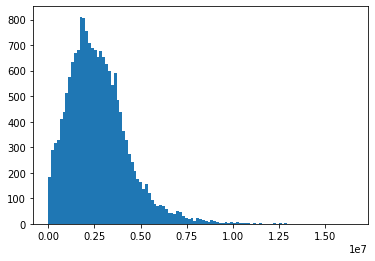

In [112]:
plt.hist(df.avg_episode_duration, bins = 'auto');

In [113]:
#replace missing values with mean
df['avg_episode_duration'].fillna(df.avg_episode_duration.mean(), inplace=True)

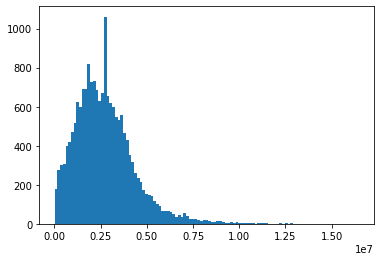

In [114]:
#print the new histogram
plt.hist(df.avg_episode_duration, bins = 'auto');

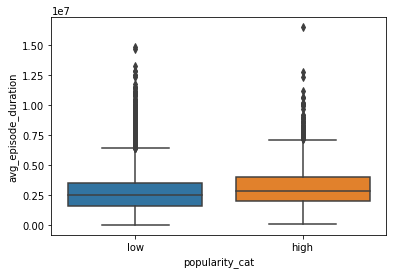

In [115]:
sns.boxplot(x = df.popularity_cat, y = df.avg_episode_duration);

In [116]:
#difference in average episode duration for high and low popularity podcasts
df['avg_episode_duration'].groupby(df['popularity_cat']).mean()

popularity_cat
high    3.195494e+06
low     2.667741e+06
Name: avg_episode_duration, dtype: float64

## Podcast description

In [117]:
#clean descriptions
df['description_clean'] = df['description'].apply(lambda x: clean_names(x))

In [118]:
#tokenize descriptions
stop_words.extend(['episode', '', 'u', 'get', 'one', 'new'])

df['description_tok'] = df['description_clean'].apply(lambda x: tokenize_names(x))

In [119]:
#get list of all words in descriptions to see most common words
all_words_description = df['description_tok'].sum()
counted_words_description = collections.Counter(all_words_description)
counted_words_description.most_common(50)

[('life', 3930),
 ('story', 3509),
 ('world', 3358),
 ('u', 2483),
 ('every', 2439),
 ('interview', 2222),
 ('join', 2197),
 ('people', 2113),
 ('help', 2034),
 ('week', 2020),
 ('host', 1966),
 ('topic', 1812),
 ('time', 1807),
 ('guest', 1789),
 ('news', 1777),
 ('hosted', 1756),
 ('business', 1745),
 ('take', 1726),
 ('weekly', 1618),
 ('thing', 1588),
 ('like', 1588),
 ('best', 1582),
 ('conversation', 1580),
 ('discus', 1535),
 ('make', 1519),
 ('share', 1506),
 ('learn', 1491),
 ('love', 1490),
 ('way', 1461),
 ('well', 1406),
 ('expert', 1373),
 ('year', 1265),
 ('real', 1247),
 ('want', 1239),
 ('industry', 1220),
 ('experience', 1190),
 ('find', 1188),
 ('episode', 1184),
 ('also', 1174),
 ('health', 1157),
 ('work', 1149),
 ('question', 1119),
 ('around', 1118),
 ('sport', 1116),
 ('day', 1094),
 ('live', 1089),
 ('game', 1080),
 ('listen', 1078),
 ('music', 1069),
 ('know', 1053)]

## Episode names

In [120]:
#clean episode names
df['ep_names_clean'] = df['episode_names'].apply(clean_names)

In [121]:
#tokenize episode names
stop_words.extend(['ep', 'part', 'e', 'season', 'w', 'se', 'v'])
df['ep_names_tok'] = df['ep_names_clean'].apply(tokenize_names)

In [122]:
#get list of all words in episode names to see most common words
all_words_ep_names = df['ep_names_tok'].sum()
counted_words_ep_names = collections.Counter(all_words_ep_names)
counted_words_ep_names.most_common(50)

[('covid', 2020),
 ('life', 1740),
 ('dr', 1655),
 ('time', 1571),
 ('interview', 1486),
 ('story', 1290),
 ('day', 1263),
 ('special', 1069),
 ('world', 1055),
 ('may', 1040),
 ('june', 979),
 ('live', 977),
 ('back', 962),
 ('black', 943),
 ('bonus', 913),
 ('v', 906),
 ('best', 894),
 ('review', 894),
 ('pandemic', 867),
 ('love', 860),
 ('chapter', 851),
 ('coronavirus', 850),
 ('business', 812),
 ('home', 805),
 ('u', 798),
 ('guest', 730),
 ('game', 728),
 ('quarantine', 720),
 ('make', 707),
 ('health', 701),
 ('way', 685),
 ('year', 680),
 ('conversation', 676),
 ('update', 666),
 ('thing', 665),
 ('news', 664),
 ('change', 651),
 ('good', 650),
 ('recap', 649),
 ('big', 648),
 ('ft', 636),
 ('top', 631),
 ('future', 630),
 ('pt', 630),
 ('need', 628),
 ('draft', 618),
 ('week', 616),
 ('john', 616),
 ('tip', 614),
 ('first', 612)]

## Episode descriptions

In [123]:
#clean episode descriptions
df['ep_descriptions_clean'] = df['episode_descriptions'].apply(clean_names)

In [124]:
#tokenize episode descriptions
df['ep_descriptions_tok'] = df['ep_descriptions_clean'].apply(tokenize_names)

In [125]:
#get list of all words in episode descriptions to see most common words
all_words_ep_descriptions = df['ep_descriptions_tok'].sum()
counted_words_ep_descriptions = collections.Counter(all_words_ep_descriptions)
counted_words_ep_descriptions.most_common(50)

[('u', 34306),
 ('n', 18894),
 ('time', 18791),
 ('discus', 18169),
 ('week', 18123),
 ('also', 17215),
 ('like', 15427),
 ('make', 15066),
 ('life', 14199),
 ('way', 13856),
 ('first', 12584),
 ('today', 12392),
 ('story', 11997),
 ('join', 11833),
 ('year', 11791),
 ('help', 11426),
 ('world', 11344),
 ('share', 10918),
 ('people', 10868),
 ('find', 10654),
 ('go', 10598),
 ('back', 10431),
 ('xan', 10381),
 ('take', 10202),
 ('work', 10138),
 ('question', 9850),
 ('book', 9650),
 ('thing', 9353),
 ('day', 9241),
 ('visit', 9223),
 ('want', 9041),
 ('well', 8997),
 ('know', 8633),
 ('free', 8249),
 ('love', 8003),
 ('learn', 7909),
 ('need', 7591),
 ('twitter', 7542),
 ('business', 7513),
 ('much', 7512),
 ('support', 7342),
 ('instagram', 7326),
 ('many', 7152),
 ('best', 7132),
 ('look', 7117),
 ('two', 7047),
 ('music', 6979),
 ('dr', 6896),
 ('use', 6882),
 ('going', 6757)]

In [126]:
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

## All tokens

In [127]:
#df.to_csv('df_processed.csv', index=False) ##Create csv with all the work done until now

In [128]:
#df = pd.read_csv('df_processed.csv') ## Rescue the CSV

In [129]:
df.head()

podcast_id                                      name   
0  1446936288       The Coach's Wife Chronicles Podcast  \
1  1205327374                                 Not Alone   
2  1450115847  Soaring the sky a glider pilot's Podcast   
3  1404709155                                 Londrelle   
4   394384987                           NHS Couch to 5K   

                                              genres   
0  ['Personal Journals', 'Podcasts', 'Society & C...  \
1  ['History', 'Podcasts', 'Religion & Spirituali...   
2                ['Aviation', 'Podcasts', 'Leisure']   
3    ['Philosophy', 'Podcasts', 'Society & Culture']   
4                   ['Health & Fitness', 'Podcasts']   

                        author   
0  The Coach's Wife Chronicles  \
1                    Not Alone   
2                 Chuck Fulton   
3                    Londrelle   
4                  NHS Choices   

                                         description content_rating   
0  Get an in depth look into life as a Coach's wi...          clean  \
1  Not Alone is a weekly podcast covering all thi...          clean   
2  An Aviation podcast about soaring with sailpla...          clean   
3  A collection of love inspired talks with poet/...          clean   
4  This is a running plan designed to get complet...          clean   

   avg_rating  num_ratings  num_ratings_1star  num_ratings_2star   
0         5.0           34                  0                  0  \
1         4.6          705                 33                 13   
2         4.6           17                  0                  1   
3         5.0          140                  0                  0   
4         4.6          195                  7                  4   

   num_ratings_3star  num_ratings_4star  num_ratings_5star   
0                  0                  0                 34  \
1                 24                 42                593   
2                  1                  1                 14   
3                  1                  1                138   
4                 11                 23                150   

                                       episode_names   
0  ['The Wife Beside You....', 'The Great Divide'...  \
1  ['18: One Hundred Twenty-Six: Dulce Base I - T...   
2  ['A Dream To Soar', 'Auto Tows Aero Tows & Win...   
3  ['What To Do In These Times', 'Choose Happines...   
4  ['Couch to 5K - Week 1', 'Couch to 5K - Week 2...   

                                episode_descriptions   
0  ["Let's get real here and dive into some topic...  \
1  ["This week we're covering one of the most int...   
2  ["Our guest pilot originally from the West Mid...   
3                           ['', '', '', '', '', '']   
4  ['Couch to 5k is a running plan designed to ge...   

                                   episode_durations   
0  [1352000, 849000, 744000, 927000, 2144000, 145...  \
1  [5766000, 4057000, 4638000, 4764000, 3977000, ...   
2  [1844000, 2202000, 2185000, 2818000, 2250000, ...   
3   [250000, 651000, 617000, 792000, 213000, 575000]   
4                                                 []   

                                       episode_dates  num_episodes_sample   
0  ['2020-06-05T00:41:31.000Z', '2019-10-02T00:58...                    6  \
1  ['2020-06-06T00:38:12.000Z', '2020-04-30T22:09...                    6   
2  ['2020-06-03T00:00:00.000Z', '2020-05-26T22:00...                    6   
3  ['2020-03-21T03:03:54.000Z', '2020-03-10T05:55...                    6   
4  ['2012-10-25T19:00:00.000Z', '2012-10-25T18:50...                    6   

                   review_ratings   
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]  \
1  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   
2           [5, 5, 5, 3, 5, 5, 5]   
3           [5, 5, 5, 5, 5, 5, 5]   
4  [5, 5, 5, 5, 5, 5, 5, 5, 4, 5]   

                                       review_titles   
0  ['Truth', 'Amen!!!', 'Truth!', 'Relatable, Fun...  \
1  ['Great podcast', 'Hiatus?', 'A Great Find', "...   
2  ['Great Podcast!', 'Interview

In [130]:
# If tokenization does not work, use this:
#df['name_tok'] =df['name_tok'].apply(lambda x: x[1:-1])
#df['description_tok'] =df['description_tok'].apply(lambda x: x[1:-1])
#df['ep_names_tok'] =df['ep_names_tok'].apply(lambda x: x[1:-1])
#df['ep_descriptions_tok'] = df['ep_descriptions_tok'].apply(lambda x: x[1:-1])

In [131]:
#create a feature which combines all the tokenized lists for name, description, episode name and episode description
df['all_tokens'] = df.name_tok.apply(ast.literal_eval) + df.description_tok.apply(ast.literal_eval) + df.ep_names_tok.apply(ast.literal_eval) + df.ep_descriptions_tok.apply(ast.literal_eval)

## All text

In [133]:
#create a feature which joins the final tokens to obtain the final text to use in the analysis
def get_final_text(tokens):
    final_text = " ".join([word for word in tokens])
    return final_text

df['all_text'] = df.all_tokens.apply(get_final_text)

# Model 1

Predict the number of positive ratings of a podcast using all the info we currently have.

In [134]:
model1_target = 'total_pos_ratings'
model1_features = ['content_rating', 'sports_genre', 'news_genre', 'education_genre', 'health_genre', 'lifestyle_genre', 'vehicles_genre', 'business_genre', 'art_genre', 'religion_genre', 'tv_genre', 'comedy_genre',
         'science_genre', 'nature_genre', 'kids_genre', 'history_genre', 'games_genre', 'documentary_genre', 'author_type', 'author_gender',
                   'avg_episode_duration']

In [135]:
#drop nulls before starting
print('before: ', df.shape)

before:  (18283, 81)


In [136]:
df.dropna(inplace = True)
print ('after: ', df.shape)

after:  (8279, 81)


In [137]:
#set X and y
y = df[model1_target]
X = df[model1_features]

In [138]:
#get dummies of categorical features
X = pd.get_dummies(X, columns = ['content_rating', 'author_type', 'author_gender'], drop_first=True)

In [139]:
#scale average episode duration
from sklearn.preprocessing import minmax_scale
X['avg_episode_duration'] = minmax_scale(X['avg_episode_duration'])

In [140]:
#take log of the target
y_log = np.log(y+1)

In [141]:
#split the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.25, random_state = 42)

In [142]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6209, 24)
(2070, 24)
(6209,)
(2070,)


In [143]:
from sklearn.linear_model import LinearRegression
multivar_model = LinearRegression().fit(X_train, y_train)

In [144]:
# print the intercept and coef
print('Intercept: {}'.format(multivar_model.intercept_))
print('Coefficients: {}'. format(multivar_model.coef_))

Intercept: 3.2321676353516953
Coefficients: [-0.42123368 -0.09639226  0.39717063  0.65676224  0.13075565 -0.79123065
  0.51297408 -0.06119972 -0.15415126 -0.63374401  0.3942154  -0.44440852
 -0.40182092 -0.19505156  0.71312933  0.05869746  0.66793757  4.10982163
  0.1473684  -0.16840354 -0.26568745 -0.10584234 -0.24026201 -0.19046976]


In [145]:
# Print the predictions
y_pred = multivar_model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[4.02429629 4.5578399  2.90395013 ... 3.93466189 5.31503733 3.52102974]
(2070,)


In [146]:
# Calculate and print the following error measures: MAE, MSE, RMSE and R2
MAE_multi_test = metrics.mean_absolute_error(y_test, y_pred)
MSE_multi_test = metrics.mean_squared_error(y_test, y_pred)
RMSE_multi_test = np.sqrt(MSE_multi_test)
R2_multi_test = metrics.r2_score(y_test, y_pred)

print('MAE Test: {}'.format(MAE_multi_test))
print('MSE Test: {}'.format(MSE_multi_test))
print('RMSE Test: {}'.format(RMSE_multi_test))
print('R2 Score Test: {}'.format(R2_multi_test))

MAE Test: 1.5607582170192165
MSE Test: 3.679705813037342
RMSE Test: 1.9182559300149034
R2 Score Test: 0.11940772718785175


In [147]:
### check overfitting
#Predictions associated to X_train
y_pred_train = multivar_model.predict(X_train)

MAE_multi_train = metrics.mean_absolute_error(y_train, y_pred_train)
MSE_multi_train = metrics.mean_squared_error(y_train, y_pred_train)
RMSE_multi_train = np.sqrt(MSE_multi_train)
R2_multi_train = metrics.r2_score(y_train, y_pred_train)

print('MAE Train: {}'.format(MAE_multi_train))
print('MSE Train: {}'.format(MSE_multi_train))
print('RMSE Train: {}'.format(RMSE_multi_train))
print('R2 Score Train: {}'.format(R2_multi_train))


MAE Train: 1.5502343873077835
MSE Train: 3.685308931144229
RMSE Train: 1.9197158464585922
R2 Score Train: 0.10113124885476021
